# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


. [Correlations](#correlations)


In [2]:
# Import necessary libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image

## Dataset Overview

[Provide a high-level overview of the dataset. This should include the source of the dataset, the number of samples, the number of features, and example showing the structure of the dataset.]


In [3]:
# Load the data

base_file_path = 'C:/Users/nikoLocal/Documents/Opencampus/Machine_Vision_challenge_data/'
print(os.path.isdir(base_file_path))
image_path = base_file_path + '/input_train/input_train'
print(os.path.isdir(image_path))

label_df = pd.read_csv(os.path.join(base_file_path, 'Y_train_eVW9jym.csv'))

# Number of samples
num_samples = label_df.shape[0]

# Number of features
num_features = label_df.shape[1]

# Display these dataset characteristics
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(label_df.head(10)) #10 rows



True
True
Number of samples: 8278
Number of features: 5
Example data:
   Unnamed: 0                                           filename  window  \
0           0  15b3bab7c186fd35b65df777890c427dd243feacbb85dd...    2003   
1           1  1856617e1ac2d821a46a41b938818f0169342226a78f93...    2003   
2           2  19066cce773b3a092ebf4311b11858aa653da6f8274957...    2003   
3           3  19c10caf4b24284e1748caed62d94cbb689d6b379b1cf5...    2003   
4           4  1a627426d55a668df8bcd381a7fa87b620481995b6755f...    2003   
5           5  1a983b65277103a6e297ca45976d18e421be3d9d6fffad...    2003   
6           6  1abd8c6915e85d01ebafe6511c12f6d9a9b99a9d80b0a0...    2003   
7           7  1ac3c9fc810f266d60b6f433a0d68ef12de0948f05177d...    2003   
8           8  1ad01b91f6e470407ca10f6279f47f2756f8e9bba8137f...    2003   
9           9  1aeb4cf593126462b228dbbfab4400bdd7eb973026250b...    2003   

     lib    Label  
0  Die01  Missing  
1  Die01     GOOD  
2  Die01  Missing  
3  Die01     

## Handling Missing Values

[Identify any missing values in the dataset, and describe your approach to handle them if there are any. If there are no missing values simply indicate that there are none.]


In [4]:
# Check for missing values
missing_values = label_df.isnull().sum()
missing_values


Unnamed: 0    0
filename      0
window        0
lib           0
Label         0
dtype: int64

In [5]:
# Handling missing values
# Example: Replacing NaN values with the mean value of the column
# df.fillna(df.mean(), inplace=True)

# There are no missing values in our case


## Feature Distributions

[Plot the distribution of various features and target variables. Comment on the skewness, outliers, or any other observations.]


Text(0.5, 0, 'category')

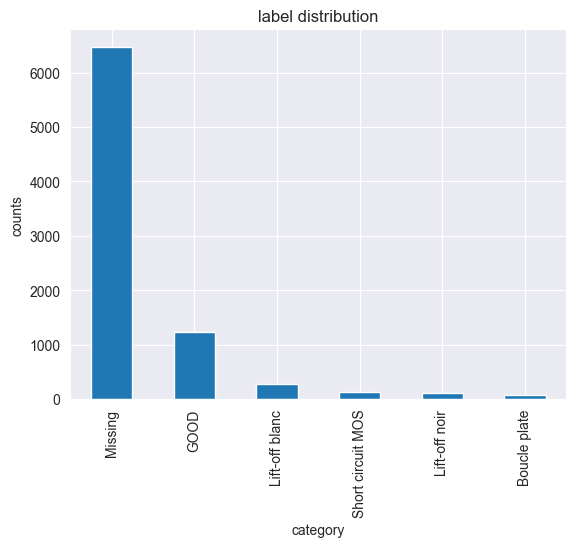

In [6]:
# Example: Plotting histograms of all numerical features

#01 label
label_df['Label'].value_counts().plot(kind='bar')
plt.title('label distribution')
plt.ylabel('counts')
plt.xlabel('category')
# labels:  Missing  , GOOD  , Lift-off blanc  , Short circuit MOS   ,  Lift-off noir   , Boucle plate


Text(0.5, 0, 'category')

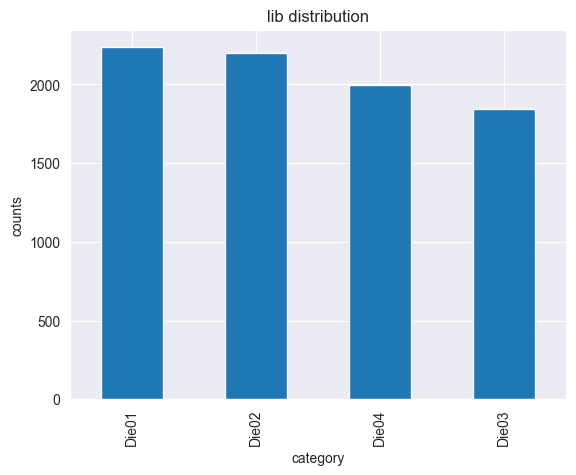

In [7]:
#02 lib
label_df['lib'].value_counts().plot(kind='bar')
plt.title('lib distribution')
plt.ylabel('counts')
plt.xlabel('category')

Text(0.5, 0, 'category')

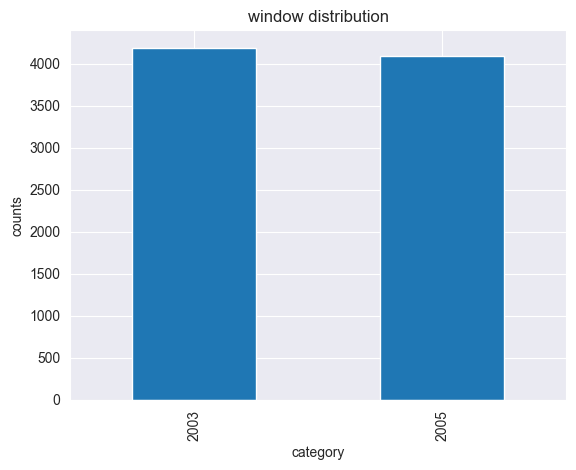

In [8]:
#03 window
label_df['window'].value_counts().plot(kind='bar')
plt.title('window distribution')
plt.ylabel('counts')
plt.xlabel('category')

## Possible Biases

[Investigate the dataset for any biases that could affect the model’s performance and fairness (e.g., class imbalance, historical biases).]


In [9]:
# Example: Checking for class imbalance in a classification problem
#sns.countplot(x='Label', data=label_df)

# Your code to investigate possible biases goes here
# the plots in the previous section already show significant bias within the Label distribution
a = label_df['Label'].value_counts()


## Correlations

[Explore correlations between features and the target variable, as well as among features themselves.]


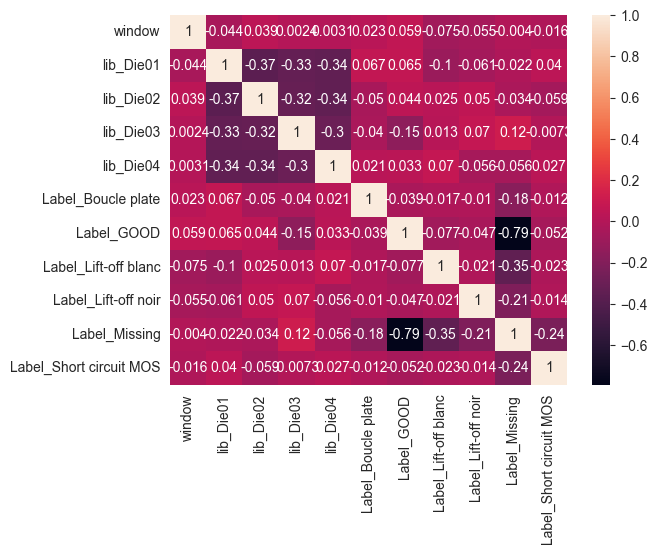

In [10]:
# Example: Plotting a heatmap to show feature correlations
# https://stackoverflow.com/questions/66836476/pandas-correlation-maxtrix-between-float-columns-and-string-columns
#pandas.get_dummies(

#get dataframe without file names:
sub_df = label_df[['window','lib','Label']]

sub_df.head()

#pd.get_dummies kind of converts str labels to one hot encoding
dummie_df = pd.get_dummies(sub_df)

dummie_df.head()
correlation_matrix = dummie_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

#ToDo
# what exactly does the correlation matrix mean? - negative correlation?



In [11]:
# better to correlate 1 column to another column?
corr2 = dummie_df[['lib_Die01','lib_Die02','lib_Die03','lib_Die04']].corrwith(dummie_df[['Label_GOOD','Label_Missing']])
#sns.heatmap(corr2, annot=True)
#plt.show()
print(corr2)

Label_GOOD      NaN
Label_Missing   NaN
lib_Die01       NaN
lib_Die02       NaN
lib_Die03       NaN
lib_Die04       NaN
dtype: float64


Inspection of the image data

1. Check whether all images are valid (can be loaded as PIL image)
2. Check whether all filenames in the label df can be mapped to the actual image filenames
3. Inspect Image resolution etc.
4. Inspect image data of different labels

In [13]:
#inspect number of data items and label items

print(image_path)

ImageFileNameList = os.listdir(image_path)

ImageNum = len(ImageFileNameList)

LabelNum = label_df.shape[0]

print('Number of images: {}'.format(ImageNum))
print('Number of labels: {}'.format(LabelNum))

C:/Users/nikoLocal/Documents/Opencampus/Machine_Vision_challenge_data//input_train/input_train
Number of images: 8278
Number of labels: 8278


In [14]:
# 1 Check whether images are all valid by loading

#easiest by loading them

from PIL import Image
import numpy as np

ImgList = list()

for i in range(ImageNum):
  temp_path = image_path  + '/' + label_df['filename'].iloc[i]

  if np.mod(i,100) == 0:
      print('{} images done'.format(i))

  try:
    Img = Image.open(temp_path)
    ImgNP = np.array(Img)
    ImgList.append(ImgNP)
  except:
    print('Failed to load image at index {}'.format(i))

0 images done
100 images done
200 images done
300 images done
400 images done
500 images done
600 images done
700 images done
800 images done
900 images done
1000 images done
1100 images done
1200 images done
1300 images done
1400 images done
1500 images done
1600 images done
1700 images done
1800 images done
1900 images done
2000 images done
2100 images done
2200 images done
2300 images done
2400 images done
2500 images done
2600 images done
2700 images done
2800 images done
2900 images done
3000 images done
3100 images done
3200 images done
3300 images done
3400 images done
3500 images done
3600 images done
3700 images done
3800 images done
3900 images done
4000 images done
4100 images done
4200 images done
4300 images done
4400 images done
4500 images done
4600 images done
4700 images done
4800 images done
4900 images done
5000 images done
5100 images done
5200 images done
5300 images done
5400 images done
5500 images done
5600 images done
5700 images done
5800 images done
5900 imag

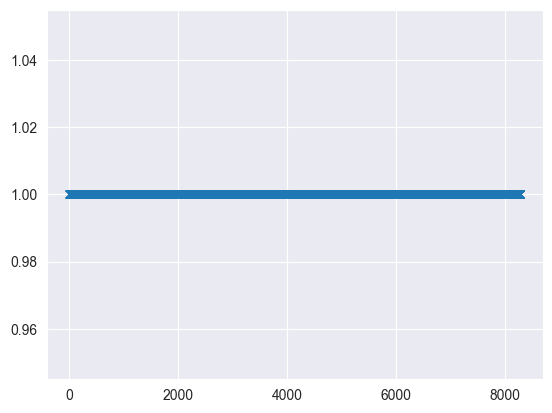

In [16]:
# 2. compare list of file names (both sorted alphanumerically)

# using os.walk because keras image dataset from directory expects label input from series to be sorted according to
# os.walk sorting of file names in folder

walk_filenames = list()

for (dirpath, dirnames, filenames) in os.walk(image_path):
    walk_filenames.append(filenames)

walk_filenames[0][1]

label_df_sortedFilenames = label_df.sort_values('filename')

CompareList = list()

for i in range(len(walk_filenames[0])):
    CompareList.append(walk_filenames[0][i] == label_df_sortedFilenames['filename'].iloc[i])

plt.figure()
plt.plot(CompareList,'x')

# all values are true (1) - sorting is valid everywhere!

Image data type is: uint8


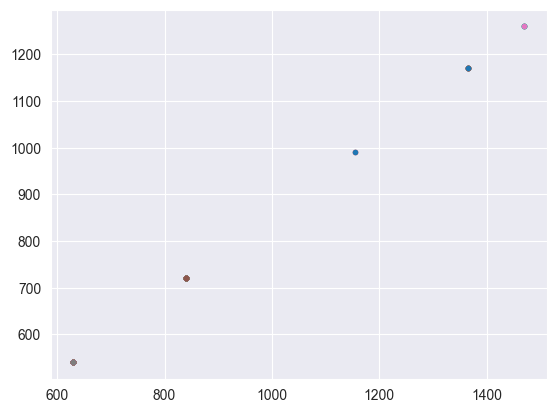

In [32]:
# 3. inspect image datatype and resolution

print('Image data type is: {}'.format(ImgList[10].dtype))

# make scatter plot of image resolutions
for i in range(ImageNum):
    plt.plot(ImgList[i].shape[0],ImgList[i].shape[1],'.')
plt.xlabel('x resolution / px')
plt.ylabel('y resolution / px')


The image are clustered in 5 different resolutions with the lowest being ~ 530x530 px
the highest resolution is more than 1200x1200 px

All images have sufficient resolution for the task - due to computing time we very likely won't use input images larger than 256x256

In [17]:
# 4. visual data inspection
# define functions for plotting for easier accessibility

def PlotLabels(df,label,grid):
    try:
        df_LabelSpec = df[df['Label'] == label]
    except:
        print('not existing label type')
        return

    num_datapoints = df_LabelSpec.shape[0]
    num_images = grid[0]*grid[1]
    #random indices
    randIndices = np.random.randint(0, high=num_datapoints, size=num_images)

    plt.figure()
    #load images
    for i in range(num_images):
        temp_path = image_path + '/' + df_LabelSpec['filename'].iloc[randIndices[i]]
        temp_image = Image.open(temp_path)
        plt.subplot(grid[0],grid[1],i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(temp_image,cmap='Greys')
        plt.xlabel('W: {} , L: {}'.format(df_LabelSpec['window'].iloc[randIndices[i]],df_LabelSpec['lib'].iloc[randIndices[i]]),fontsize=7)

    plt.suptitle('Label = {}'.format(label))

def PlotLib(df,label,grid):
    try:
        df_LabelSpec = df[df['lib'] == label]
    except:
        print('not existing label type')
        return

    num_datapoints = df_LabelSpec.shape[0]
    num_images = grid[0]*grid[1]
    #random indices
    randIndices = np.random.randint(0, high=num_datapoints, size=num_images)

    plt.figure()
    #load images
    for i in range(num_images):
        temp_path = image_path + '/' + df_LabelSpec['filename'].iloc[randIndices[i]]
        temp_image = Image.open(temp_path)
        plt.subplot(grid[0],grid[1],i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(temp_image,cmap='Greys')
        plt.xlabel('L: {} , W: {}'.format(df_LabelSpec['Label'].iloc[randIndices[i]],df_LabelSpec['window'].iloc[randIndices[i]]),fontsize=7)

    plt.suptitle('lib = {}'.format(label))

def PlotWindow(df,label,grid):
    try:
        df_LabelSpec = df[df['window'] == label]
    except:
        print('not existing label type')
        return

    num_datapoints = df_LabelSpec.shape[0]
    num_images = grid[0]*grid[1]
    #random indices
    randIndices = np.random.randint(0, high=num_datapoints, size=num_images)

    plt.figure()
    #load images
    for i in range(num_images):
        temp_path = image_path + '/' + df_LabelSpec['filename'].iloc[randIndices[i]]
        temp_image = Image.open(temp_path)
        plt.subplot(grid[0],grid[1],i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(temp_image,cmap='Greys')
        plt.xlabel('L: {} , L: {}'.format(df_LabelSpec['Label'].iloc[randIndices[i]],df_LabelSpec['lib'].iloc[randIndices[i]]),fontsize=7)

    plt.suptitle('window = {}'.format(label))

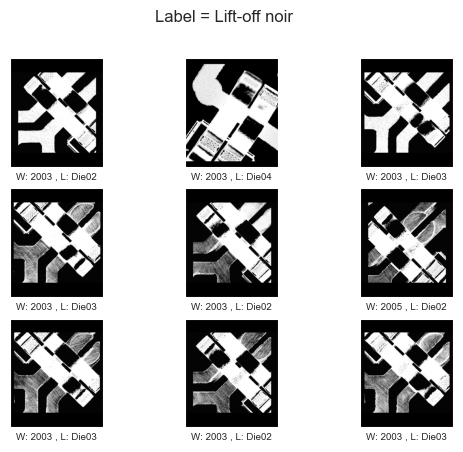

In [18]:
# plot random images that have same 'Label' feature
# labels:  Missing  , GOOD  , Lift-off blanc  , Short circuit MOS   ,  Lift-off noir   , Boucle plate
InspectLabel = 'Lift-off noir'
PlotLabels(label_df,InspectLabel,[3,3])
#save the figure to file for use in presentations etc.
FileSaveDir = base_file_path + 'ExpDataAnalysis/Plots'

if not os.path.isdir(FileSaveDir):
    os.mkdir(FileSaveDir)

FileSaveName = FileSaveDir + '/' + InspectLabel + '.png'
plt.savefig(FileSaveName, transparent=None, dpi=300, format=None,
        metadata=None, bbox_inches=None, pad_inches=0.01,
        facecolor='auto', edgecolor='auto', backend=None
       )

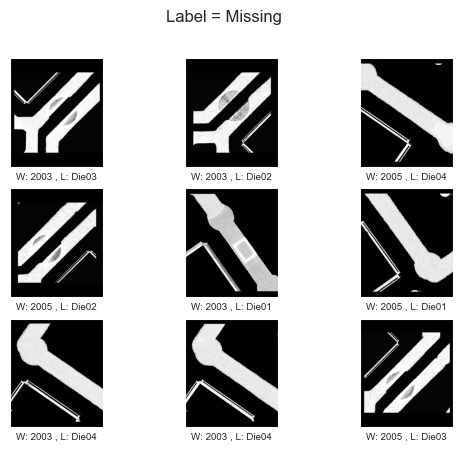

In [19]:
# labels:  Missing  , GOOD  , Lift-off blanc  , Short circuit MOS   ,  Lift-off noir   , Boucle plate
InspectLabel = 'Missing'
PlotLabels(label_df,InspectLabel,[3,3])

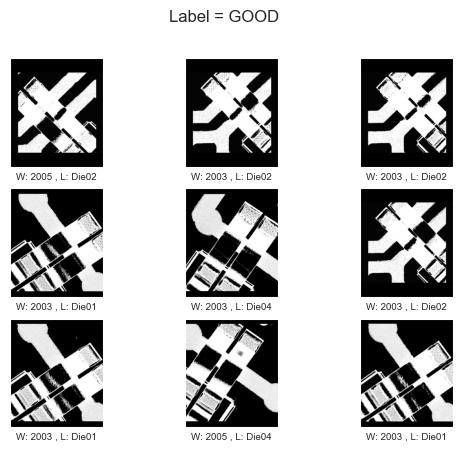

In [20]:
# labels:  Missing  , GOOD  , Lift-off blanc  , Short circuit MOS   ,  Lift-off noir   , Boucle plate
# change InspectLabel String to inspect other label types
InspectLabel = 'GOOD'
PlotLabels(label_df,InspectLabel,[3,3])

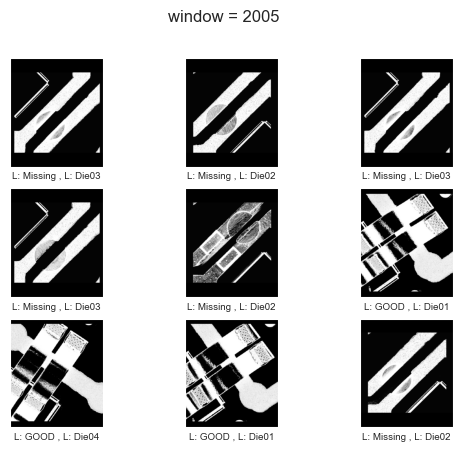

In [21]:
# plot random images that have same 'window' feature
# window: 2003 , 2005  - have to be input as integers
# window need to be int
PlotWindow(label_df_sortedFilenames,2005,[3,3])

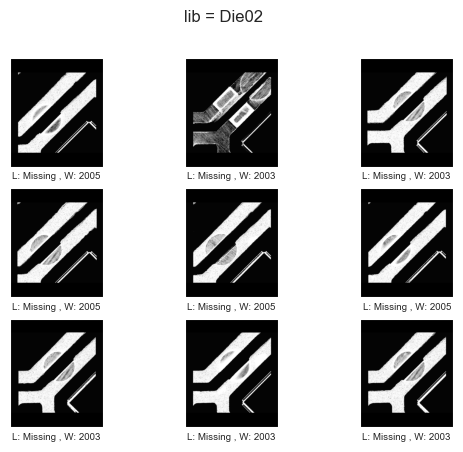

In [22]:
# plot random images that have same 'lib' feature
# libs = Die01 , Die02 , Die03 , Die04

PlotLib(label_df_sortedFilenames,'Die02',[3,3])